<a href="https://colab.research.google.com/github/farima-trb/MMU-Courseworks/blob/main/Copy_of_Final_PofDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Arial" size=5 color='#788cac'> Importing Packages and Loading Dataset <font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel



# <font face="Arial" size=5 color='#788cac'> 1. Data Understanding and Exploration <font>

# <font face="Arial" size=4 color='#8496b3'> 1.1 Meaning and Type of Features (3-4)
<font face="Arial" size=3 color='#8496b3'>(e.g., what the features convey/measure)
<font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
# feature's missing values number
print("number of missing values in the features:\n")
print("year_of_registration: ",df.loc[df["year_of_registration"].isnull()].shape)
print("reg_code: ",df.loc[df["reg_code"].isnull()].shape)
print("mileage: ",df.loc[df["mileage"].isnull()].shape)
print("vehicle_condition: ",df.loc[df["vehicle_condition"].isnull()].shape)

number of missing values in the features:

year_of_registration:  (33311, 12)
reg_code:  (31857, 12)
mileage:  (127, 12)
vehicle_condition:  (0, 12)


In [ ]:
# range of values in year_of_registration feature

df["year_of_registration"].min(), df["year_of_registration"].max()

(999.0, 2020.0)

In [ ]:
# year of registration is not as same as the age of the vahicle
# e.g a car can be produced in 2019 and its registration be 2021

In [ ]:
df.loc[df["public_reference"]==202006270588110]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,7,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid


In [ ]:
# Unregistered vehicles
df.loc[(df["vehicle_condition"]=="NEW") & (df["year_of_registration"].isnull()) & (df["reg_code"].isnull())].shape

(31249, 12)

In [ ]:
df.loc[df['vehicle_condition']=="NEW"].equals(df.loc[(df["vehicle_condition"]=="NEW") & (df["year_of_registration"].isnull()) & (df["reg_code"].isnull())])

True

In [ ]:
# Vehicle Condition feature

df["vehicle_condition"].value_counts()

,count
vehicle_condition,
USED,370756
NEW,31249


In [ ]:
# Mileage feature

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print("Identify outliers: ", lower_bound, ",", upper_bound)
print("mileage range: ","(", df['mileage'].min(),",", df['mileage'].max(),")")

Identify outliers:  -59111.125 , 126467.875
mileage range:  ( 0.0 , 999999.0 )


In [ ]:
df.loc[(df["mileage"]==0.0) & (df["vehicle_condition"]=="NEW")].shape

(15852, 12)

In [ ]:
# "NEW" cars with not 0 value for mileage
# vehicles that drived from the firm to the customer
df.loc[(df["mileage"]!=0.0) & (df["vehicle_condition"]=="NEW")].shape

(15397, 12)

In [ ]:
# "USED" cars with 0 value for mileage
# registered cars which are new but they didn't travel any distances or
# a mistake in the data entry process
df.loc[(df["mileage"]==0.0) & (df["vehicle_condition"]=="USED")].shape

(355, 12)

In [ ]:
df.loc[df["vehicle_condition"]== "NEW", "mileage"].agg(['min', 'max']).to_dict()

{'min': 0.0, 'max': 100.0}

In [ ]:
df.loc[df["vehicle_condition"]== "USED", "mileage"].agg(['min', 'max']).to_dict()

{'min': 0.0, 'max': 999999.0}

# <font face="Arial" size=4 color='#8496b3'> 1.2 Analysis of Distributions (3-4)
<font>

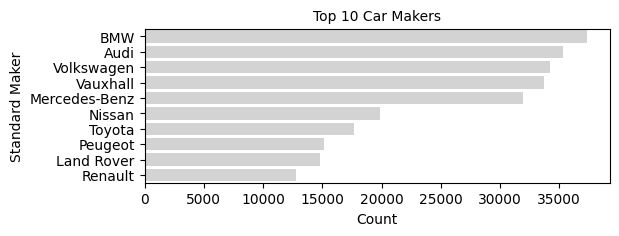

In [ ]:
# Distribution of cars produced among top 10 standard_make

plt.figure(figsize=(6,2))

sns.barplot(df["standard_make"].value_counts().head(10), color='lightgrey', orient = 'h')
plt.title('Top 10 Car Makers', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Standard Maker', fontsize=10)

plt.show()

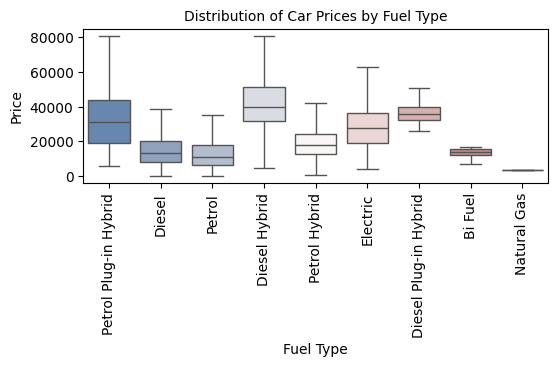

In [ ]:
# Distribution of price across fuel_type

plt.figure(figsize=(6, 2))
sns.boxplot(data=df, x='fuel_type', y='price', showfliers=False, hue='fuel_type', legend=False, palette='vlag')
plt.title('Distribution of Car Prices by Fuel Type', fontsize=10)
plt.xlabel('Fuel Type', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Calculate the median price for all fuel types
median_prices = df.groupby('fuel_type')['price'].median().reset_index()

# Sort the median prices for all fuel types in descending order
sorted_median_prices = median_prices.sort_values(by='price', ascending=False).reset_index(drop=True)
sorted_median_prices

,fuel_type,price
0,Diesel Hybrid,39990.0
1,Diesel Plug-in Hybrid,35991.0
2,Petrol Plug-in Hybrid,30995.0
3,Electric,27894.0
4,Petrol Hybrid,17814.0
5,Bi Fuel,14000.0
6,Diesel,13495.0
7,Petrol,11000.0
8,Natural Gas,3795.0


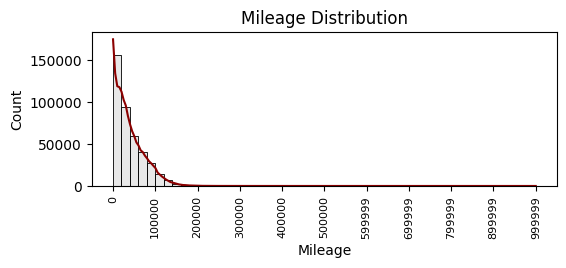

In [ ]:
plt.figure(figsize=(6, 2))

# Plot the histogram
ax = sns.histplot(df['mileage'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

# Define xticks based on the bins
min_mileage = df['mileage'].min()
max_mileage = df['mileage'].max()

bin_width = (max_mileage - min_mileage) / 10
xticks = np.arange(min_mileage, max_mileage + bin_width, bin_width)

plt.xticks(xticks, fontsize=8, rotation=90)
plt.title('Mileage Distribution', fontsize=12)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.show()


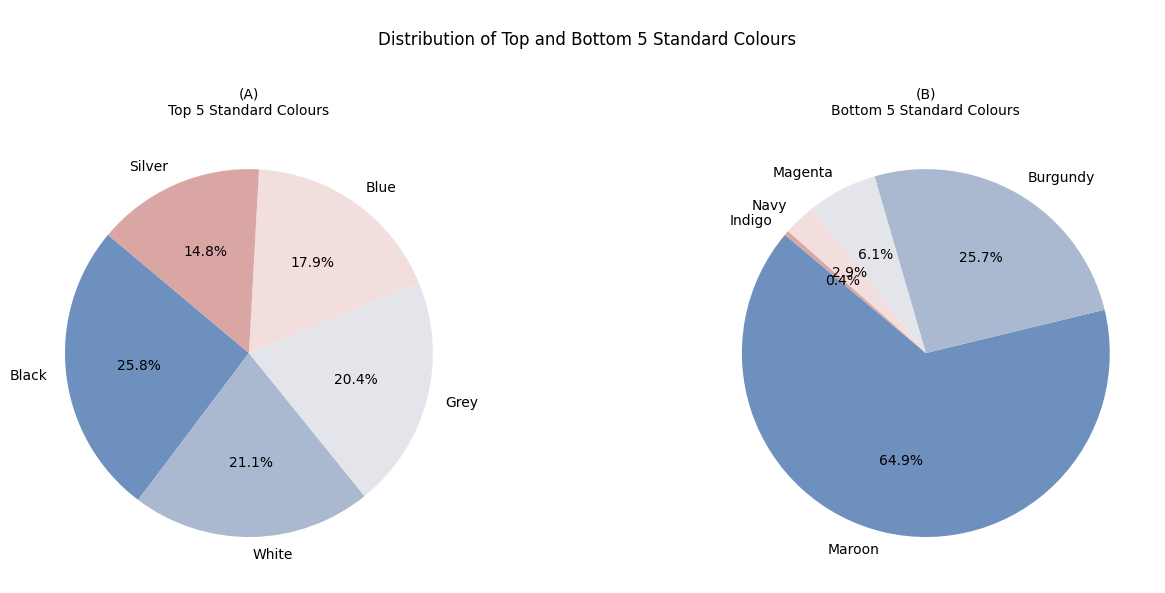

In [ ]:
top_colours = df['standard_colour'].value_counts().head(5)
bottom_colours = df['standard_colour'].value_counts().tail(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pastel_colors = sns.color_palette('vlag')

# Top 5 Colors
axes[0].pie(
    top_colours,
    labels=top_colours.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=pastel_colors[:len(top_colours)]
)
axes[0].set_title('(A)\nTop 5 Standard Colours', fontsize=10)

# Bottom 5 Colors
axes[1].pie(
    bottom_colours,
    labels=bottom_colours.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=pastel_colors[:len(top_colours)]
)
axes[1].set_title('(B)\nBottom 5 Standard Colours', fontsize=10)


plt.suptitle('\nDistribution of Top and Bottom 5 Standard Colours\n', fontsize=12)
plt.tight_layout()
plt.show()




In [ ]:
df.loc[df["standard_colour"]=="Indigo"]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
331032,202010064661534,54927.0,64,Indigo,Jaguar,F-Type,USED,2014.0,27000,Convertible,False,Petrol


# <font face="Arial" size=5 color='#788cac'> 2. Data Preprocessing <font>

# <font face="Arial" size=4 color='#8496b3'> 2.1. Data Cleaning (2-3)
<font face="Arial" size=3 color='#8496b3'>(e.g., dealing with incorrect values, outliers) <font>

# <font face="Arial" size=3 color='#a9b5ca'> 2.1.1. Dealing with incorrect, missing values, and outliers of <font face="Arial" size=3 color='#9f647a'>year_of_registration<font> <font face="Arial" size=3 color='#a9b5ca'>and<font> <font face="Arial" size=3 color='#9f647a'>reg_code<font>
<font>

In [ ]:
# Dealing with incorrect and missing values of year_of_registration and reg_code
# by fillling them based on each other and vehicle_condition

In [ ]:
# When the vehicle is unregistered, year_of_registration and reg_code have null values
# and the vehicle_condition is defined as NEW
# So we set the year 2021 for these records because the last vehicles in this dataset were registered in 2020

df.loc[(df['year_of_registration'].isnull()) & (df['reg_code'].isnull()) & (df['vehicle_condition']=='NEW')] = df.loc[(df['year_of_registration'].isnull()) & (df['reg_code'].isnull()) & (df['vehicle_condition']=='NEW'), :].fillna({'year_of_registration':(df["year_of_registration"].max())+1})

In [ ]:
import random

# Mapping dictionary
year_to_reg_codes = {
    1963.0: ['A'], 1964.0: ['B'], 1965.0: ['C'], 1966.0: ['D'], 1967.0: ['E', 'F'],
    1968.0: ['G'], 1969.0: ['H'], 1970.0: ['J'], 1971.0: ['K'], 1972.0: ['L'],
    1973.0: ['M'], 1974.0: ['N'], 1975.0: ['P'], 1976.0: ['R'], 1977.0: ['S'],
    1978.0: ['T'], 1979.0: ['V'], 1980.0: ['W'], 1981.0: ['X'], 1982.0: ['Y'],
    1983.0: ['A'], 1984.0: ['B'], 1985.0: ['C'], 1986.0: ['D'], 1987.0: ['E'],
    1988.0: ['F'], 1989.0: ['G'], 1990.0: ['H'], 1991.0: ['J'], 1992.0: ['K'],
    1993.0: ['L'], 1994.0: ['M'], 1995.0: ['N'], 1996.0: ['P'], 1997.0: ['R'],
    1998.0: ['S'], 1999.0: ['T', 'V'], 2000.0: ['V', 'X'],
    2001.0: ['Y', '51'], 2002.0: ['2', '52'], 2003.0: ['3', '53'], 2004.0: ['4', '54'],
    2005.0: ['5', '55'], 2006.0: ['6', '56'], 2007.0: ['7', '57'], 2008.0: ['8', '58'],
    2009.0: ['9', '59'], 2010.0: ['10', '60'], 2011.0: ['11', '61'], 2012.0: ['12', '62'],
    2013.0: ['13', '63'], 2014.0: ['14', '64'], 2015.0: ['15', '65'], 2016.0: ['16', '66'],
    2017.0: ['17', '67'], 2018.0: ['18', '68'], 2019.0: ['19', '69'], 2020.0: ['20', '70'], 2021.0: ['21', '71']
}

# Reverse mapping for reg_code -> years
reg_code_to_year = {code: year for year, codes in year_to_reg_codes.items() for code in codes}

# Function to correct the values
def correct_values(row):
    year = row['year_of_registration']
    reg_code = row['reg_code']
    mileage = row['mileage']

    # Step 1: Use year_of_registration to guess reg_code
    if pd.notnull(year) and year in year_to_reg_codes:
        guessed_reg_code = random.choice(year_to_reg_codes[year])  # Pick a valid reg_code for the year
        return year, guessed_reg_code

    # Step 2: Use reg_code to guess year_of_registration
    if pd.notnull(reg_code) and reg_code in reg_code_to_year:
        guessed_year = reg_code_to_year[reg_code]
        return guessed_year, reg_code

    return year, reg_code


In [ ]:
# Applying the function to correct the values
df[['year_of_registration', 'reg_code']] = df.apply(lambda row: pd.Series(correct_values(row)), axis=1)

In [ ]:
df.loc[df["year_of_registration"]<1963].shape

(44, 12)

In [ ]:
# Example of a valid outlier
df.loc[df["public_reference"]==202009264242828]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
156562,202009264242828,48000.0,FW,Black,Morris,10,USED,1934.0,5995,Saloon,False,Petrol


In [ ]:
# drop these the vehicles with year_of_registration< 1963 because their amount
# is less and comparing them with modern vehicles is not a logical thing to do
# Although there are valid records among them like Morris Ten in 1933

df.drop(df.loc[df["year_of_registration"]<1963].index, inplace=True)

In [ ]:
df.loc[df["year_of_registration"].isnull()].shape

(330, 12)

In [ ]:
df.loc[df["reg_code"].isnull()].shape

(321, 12)

In [ ]:
df.loc[(df["year_of_registration"].isnull()) & ~(df["reg_code"].isnull())].shape

(9, 12)

In [ ]:
# values above have invalid reg_code and null year_of_registration
# so the dictionary couldn't recognise them

In [ ]:
 # Defining the transformation function based on grouping

def fill_missing_year(grouped_df, df):

    return grouped_df['year_of_registration'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['year_of_registration'].mode()[0])
    )

In [ ]:
# Apply the group-based imputation function
df['year_of_registration'] = fill_missing_year(
    df.groupby(['standard_make', 'standard_model']),df
)

In [ ]:
grouped_modes = df.groupby(['standard_make', 'standard_model'])['year_of_registration'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
grouped_modes.columns = ['standard_make', 'standard_model', 'year_of_registration_mode']
grouped_modes

,standard_make,standard_model,year_of_registration_mode
0,AC,Cobra,2017.0
1,AK,Cobra,2011.0
2,Abarth,124 Spider,2018.0
3,Abarth,500,2009.0
4,Abarth,500C,2012.0
...,...,...,...
1195,Westfield,Se,2017.0
1196,Westfield,Sei,1992.0
1197,Westfield,Sport,1997.0
1198,Wolseley,6/110,1964.0


In [ ]:
df.loc[df["year_of_registration"].isnull()].shape

(0, 12)

In [ ]:
df.loc[df["reg_code"].isnull()].shape

(321, 12)

In [ ]:
# Apply the function to correct the values
df[['year_of_registration', 'reg_code']] = df.apply(lambda row: pd.Series(correct_values(row)), axis=1)

In [ ]:
def check_sync(row):
    year = row['year_of_registration']
    reg_code = row['reg_code']

    # Check if both year_of_registration and reg_code are valid
    if pd.notnull(year) and pd.notnull(reg_code):
        # Verify that reg_code matches year_of_registration
        valid_reg_codes = year_to_reg_codes.get(year, [])
        if reg_code in valid_reg_codes:
            return True  # Sync is valid
        else:
            return False  # reg_code does not match year_of_registration

    # If one of them is missing, consider checking against the other
    elif pd.notnull(year):
        # Check if any reg_code matches the given year
        valid_reg_codes = year_to_reg_codes.get(year, [])
        return bool(valid_reg_codes)  # Returns True if there is a valid reg_code for the year

    elif pd.notnull(reg_code):
        # Check if the reg_code maps to a valid year
        return reg_code in reg_code_to_year  # Returns True if reg_code is valid

    return False  # If both are missing or invalid, return False

# Apply the function to each row and check if reg_code and year_of_registration are in sync
df['sync_check'] = df.apply(check_sync, axis=1)

In [ ]:
# check if all the values of year_of_registration and reg_code are sync
df['sync_check'].all()

np.True_

In [ ]:
df.loc[df["year_of_registration"].isnull()].shape

(0, 13)

In [ ]:
df.loc[df["reg_code"].isnull()].shape

(0, 13)

# <font face="Arial" size=3 color='#a9b5ca'> 2.1.2. Dealing with missing values of <font face="Arial" size=3 color='#9f647a'>fuel_type<font>
<font>

In [ ]:
df.loc[df["fuel_type"].isnull()].shape

(595, 13)

In [ ]:
# Calculate the global mode of fuel_type for fallback
global_mode_fuel_type = df['fuel_type'].mode()[0]
# which is Petrol

df['fuel_type'] = df.groupby(['standard_make', 'standard_model'])['fuel_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_fuel_type)
)

In [ ]:
df.loc[df["fuel_type"].isnull()].shape

(0, 13)

# <font face="Arial" size=3 color='#a9b5ca'> 2.1.3. Dealing with outliers and missing values of <font face="Arial" size=3 color='#9f647a'>mileage<font>
<font>

In [ ]:
df.loc[df["mileage"].isnull()].shape

(126, 13)

In [ ]:
# Group by 'standard_make', 'standard_model', and 'fuel_type'
def process_mileage(group):
    # Fill Missing Values with Group Median
    median = group['mileage'].median()
    group['mileage'] = group['mileage'].fillna(median)

    # Capping Outliers by Using IQR
    Q1 = group['mileage'].quantile(0.25)
    Q3 = group['mileage'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above the upper bound
    group['mileage'] = group['mileage'].apply(lambda x: min(x, upper_bound))

    return group

# Apply the function to each group
df = df.groupby(['standard_make', 'standard_model', 'fuel_type']).apply(process_mileage).reset_index(drop=True)


<ipython-input-29-d8f1c7e99e80>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['standard_make', 'standard_model', 'fuel_type']).apply(process_mileage).reset_index(drop=True)


In [ ]:
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Identify outliers: ", lower_bound, ",", upper_bound)
print("mileage range: ","(", df['mileage'].min(),",", df['mileage'].max(),")")

Identify outliers:  -58297.25 , 124972.75
mileage range:  ( 0.0 , 368199.0 )


In [ ]:
df.loc[df["mileage"].isnull()].shape

(0, 13)

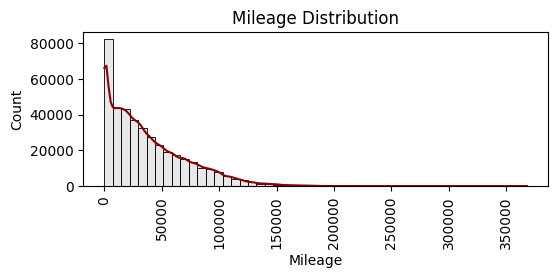

In [ ]:
plt.figure(figsize=(6, 2))

# Plot the histogram with custom bins
ax= sns.histplot(df['mileage'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

# Customize the x-axis ticks and labels
plt.title('Mileage Distribution', fontsize=12)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
# checking the correlation of mileage and price

In [ ]:
# Linear Correlation
# Calculate Pearson Correlation between numerical features and price
pearson_corr = df[['mileage', 'year_of_registration', 'price']].corr(method='pearson')

display(pearson_corr)

,mileage,year_of_registration,price
mileage,1.000000,-0.730273,-0.162658
year_of_registration,-0.730273,1.000000,0.127012
price,-0.162658,0.127012,1.000000


In [ ]:
# Non-linear Correlation
# Calculate Spearman Correlation with price
spearman_corr= df[['mileage', 'year_of_registration', 'price']].corr(method='spearman')

display(spearman_corr)

,mileage,year_of_registration,price
mileage,1.000000,-0.861406,-0.645275
year_of_registration,-0.861406,1.000000,0.704944
price,-0.645275,0.704944,1.000000


# <font face="Arial" size=3 color='#a9b5ca'> 2.1.4. Dealing with missing values of <font face="Arial" size=3 color='#9f647a'>standard_colour<font>
<font>

In [ ]:
df.loc[df["standard_colour"].isnull()].shape

(5374, 13)

In [ ]:
# Global mode for fallback
global_mode_colour = df['standard_colour'].mode()[0]
# which is Black

# Fill missing 'standard_colour' based on mode within groups
df['standard_colour'] = df.groupby(['standard_make', 'standard_model'])['standard_colour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_colour)
)

In [ ]:
df.loc[df["standard_colour"].isnull()].shape

(0, 13)

# <font face="Arial" size=3 color='#a9b5ca'> 2.1.4. Dealing with missing values of <font face="Arial" size=3 color='#9f647a'>body_type<font>
<font>

In [ ]:
df.loc[df["body_type"].isnull()].shape

(829, 13)

In [ ]:
# Calculate the global mode of fuel_type for fallback
global_mode_body_type = df['body_type'].mode()[0]
# which is Hatchback

df['body_type'] = df.groupby(['standard_make', 'standard_model'])['body_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_body_type)
)

In [ ]:
df.loc[df["body_type"].isnull()].shape

(0, 13)

In [ ]:
# Define luxury vehicles based on price threshold
# df['is_premium'] = df['price'] > df['price'].quantile(0.75)
# which df['price'].quantile(0.75) is 20000.0

# <font face="Arial" size=4 color='#8496b3'> 2.2. Feature Engineering (2-3)
<font face="Arial" size=3 color='#8496b3'>(e.g., deriving informative features) <font>

# <font face="Arial" size=3 color='#a9b5ca'> 2.2.1. <font>  <font face="Arial" size=3 color='#a9b5ca'>Binning Method on price and create <font> <font face="Arial" size=3 color='#9f647a'>price_category<font> <font face="Arial" size=3 color='#a9b5ca'>feature<font>

In [ ]:
# in order to compare price with other categorical features (e.ge checking the association)
# the price numerical feature is modified to another column with 3 categories of
# low, medium, high(premium) with this logic:

In [ ]:
# price category

bin_edges = df['price'].quantile([0, 0.25, 0.75, 1]).values

price_bin_bounds = {
    'Low': (bin_edges[0], bin_edges[1]),
    'Medium': (bin_edges[1], bin_edges[2]),
    'High(premium)': (bin_edges[2], bin_edges[3])
}

# upper and lower bands of each category
print(price_bin_bounds)

{'Low': (120.0, 7495.0), 'Medium': (7495.0, 20000.0), 'High(premium)': (20000.0, 9999999.0)}


In [ ]:
# create new feature "price_category"
df['price_category'] = pd.cut(
    df['price'],
    bins=[df['price'].min(), df['price'].quantile(0.25), df['price'].quantile(0.75), df['price'].max()],
    labels=['Low', 'Medium', 'High(premium)'],
    include_lowest=True
)

In [ ]:
df.loc[df['price_category']=="High(premium)"].value_counts().shape

(99694,)

# <font face="Arial" size=3 color='#a9b5ca'> 2.2.2. <font>  <font face="Arial" size=3 color='#a9b5ca'>Log Transform Method on price and create <font> <font face="Arial" size=3 color='#9f647a'>log_price<font> <font face="Arial" size=3 color='#a9b5ca'>feature<font>


In [ ]:
# Apply log transformation to price
df['log_price'] = np.log1p(df['price'])

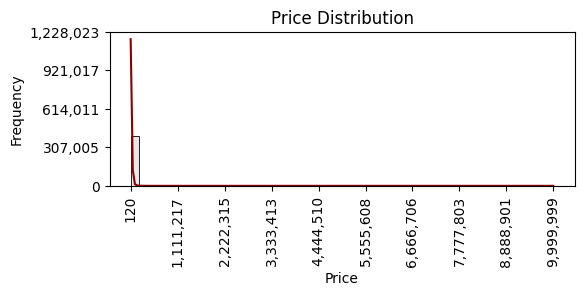

In [ ]:
# price distribution before log transform

plt.figure(figsize=(6, 2))

# Plot the histogram with custom bins
ax= sns.histplot(df['price'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

plt.title('Price Distribution', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# x-ticks (Price)
xticks = np.linspace(df['price'].min(), df['price'].max(), num=10)  # 10 evenly spaced ticks
plt.xticks(xticks, labels=["{:,}".format(int(x)) for x in xticks], fontsize=10, rotation=90)

# y-ticks (Frequency)
y_max = ax.get_ylim()[1]
yticks = np.linspace(0, y_max, num=5)  # 5 evenly spaced ticks
ytick_labels = ["{:,}".format(int(y)) for y in yticks]
plt.yticks(yticks, labels=ytick_labels, fontsize=10)


plt.show()

In [ ]:
df['price'].min(), df['price'].max()

(120, 9999999)

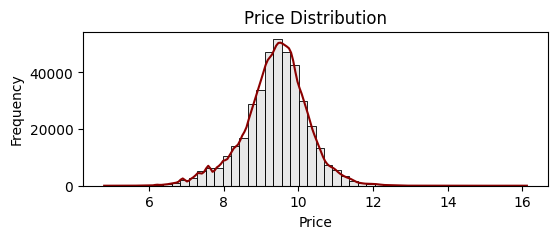

In [ ]:
# price distribution after log transform

plt.figure(figsize=(6, 2))

ax= sns.histplot(df['log_price'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

plt.title('Price Distribution', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
df['log_price'].head()

,log_price
0,11.771444
1,11.461116
2,11.461116
3,10.714329
4,9.835797


In [ ]:
df['log_price'].min(), df['log_price'].max()

(4.795790545596741, 16.11809565095832)

In [ ]:
# Apply log transformation to price
df['log_mileage'] = np.log1p(df['mileage'])

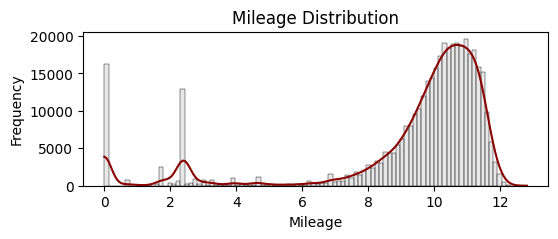

In [ ]:
# price distribution after log transform

plt.figure(figsize=(6, 2))

ax= sns.histplot(df['log_mileage'], bins=100, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

plt.title('Mileage Distribution', fontsize=12)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# <font face="Arial" size=4 color='#8496b3'> 2.3. Subsetting (2-3)
<font face="Arial" size=3 color='#8496b3'>(e.g., filtering, feature selection, and row sampling) <font>

# <font face="Arial" size=3 color='#a9b5ca'> 2.3.1. Feature Selection
<font>

In [ ]:
from scipy.stats import chi2_contingency

# categorical features for Chi-Square Test
categorical_features = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type']

# Chi-Square Test for each categorical feature
chi_square_results_quartiles = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['price_category'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results_quartiles[feature] = {'Chi2 Statistic': chi2, 'p-value': p}

chi_square_df_quartiles = pd.DataFrame.from_dict(chi_square_results_quartiles, orient='index')
display(chi_square_df_quartiles)

,Chi2 Statistic,p-value
standard_colour,15373.486452,0.000000e+00
standard_make,109029.141594,0.000000e+00
standard_model,272198.169999,0.000000e+00
vehicle_condition,43173.888094,0.000000e+00
body_type,67203.945993,0.000000e+00
crossover_car_and_van,585.865613,6.038075e-128
fuel_type,25474.799895,0.000000e+00


In [ ]:
# Calculate Spearman Correlation with price
spearman_corr= df[['mileage', 'year_of_registration', 'price']].corr(method='spearman')

display(spearman_corr)

,mileage,year_of_registration,price
mileage,1.000000,-0.861406,-0.645275
year_of_registration,-0.861406,1.000000,0.704944
price,-0.645275,0.704944,1.000000


In [ ]:
# since the H0 is assuming there's no association
# based on the chi2 scores standard_model > standard_make > body_type have more importantance for us

# <font face="Arial" size=3 color='#a9b5ca'> 2.3.2. Filtering
<font>

In [ ]:
df['body_type'].unique()

array(['Convertible', 'Hatchback', 'Saloon', 'Estate', 'Coupe', 'SUV',
       'Panel Van', 'MPV', 'Pickup', 'Combi Van', 'Limousine',
       'Window Van', 'Camper', 'Chassis Cab', 'Car Derived Van',
       'Minibus'], dtype=object)

In [ ]:
df.groupby('body_type')['price'].mean().sort_values(ascending=False).head(5)

,price
body_type,
Limousine,58953.911950
Coupe,36125.694049
Camper,34197.380435
Convertible,27096.675305
Minibus,22507.051724


In [ ]:
df.loc[df['body_type']=='Limousine'].sort_values(by='price', ascending=False).head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,sync_check,price_category,log_price
273840,202010034545402,103.0,70,Green,Rolls-Royce,Phantom,USED,2020.0,374950,Limousine,False,Petrol,True,High(premium),12.834551
273821,202010215256903,1450.0,18,Purple,Rolls-Royce,Phantom,USED,2018.0,350000,Limousine,False,Petrol,True,High(premium),12.765691
273820,202009234081068,19.0,20,Blue,Rolls-Royce,Phantom,USED,2020.0,345000,Limousine,False,Petrol,True,High(premium),12.751303
273830,201907260487870,2942.0,19,Red,Rolls-Royce,Phantom,USED,2019.0,334950,Limousine,False,Petrol,True,High(premium),12.721740
273793,202002117189199,63.0,19,Black,Rolls-Royce,Phantom,USED,2019.0,329900,Limousine,False,Petrol,True,High(premium),12.706548


# <font face="Arial" size=5 color='#788cac'> 3. Analysis of Associations and Group Differences <font>

# <font face="Arial" size=4 color='#8496b3'> 3.1. Quantitative - Quantitative (2-3)
<font>

# <font face="Arial" size=3 color='#a9b5ca'> 3.1.1. Year of Registration vs. Price
<font>

In [ ]:
df[(df['year_of_registration'] >= 1963) & (df['year_of_registration'] <= 1983)].shape

(341, 15)

In [ ]:
df[(df['year_of_registration'] > 1983) & (df['year_of_registration'] <= 2003)].shape

(5693, 15)

In [ ]:
df[(df['year_of_registration'] > 2003) & (df['year_of_registration'] <= 2021)].shape

(395927, 15)

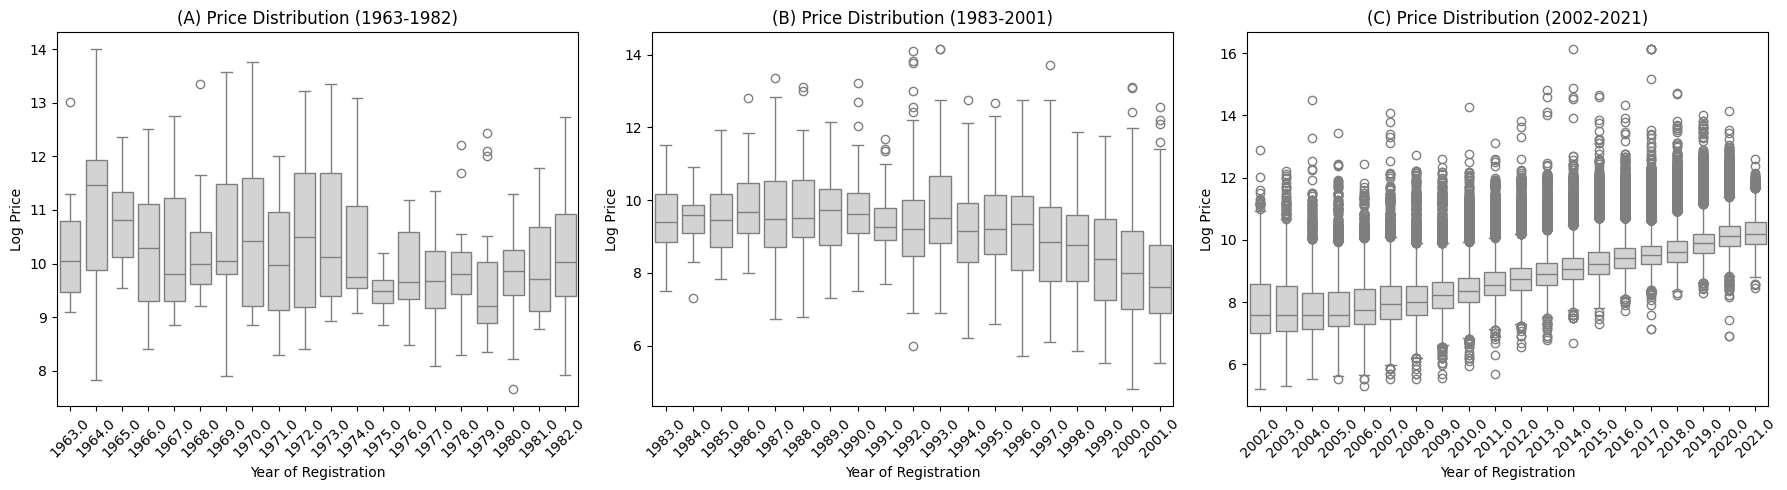

In [ ]:
# subsets of three year ranges
df_1963_1982 = df[(df['year_of_registration'] >= 1963) & (df['year_of_registration'] < 1983)]
df_1983_2001 = df[(df['year_of_registration'] >= 1983) & (df['year_of_registration'] < 2002)]
df_2003_2021 = df[(df['year_of_registration'] >= 2002) & (df['year_of_registration'] <= 2021)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1963-1983
sns.boxplot(data=df_1963_1982, x='year_of_registration', y='log_price', ax=axes[0], color='lightgrey')
axes[0].set_title('(A) Price Distribution (1963-1982)')
axes[0].set_xlabel('Year of Registration')
axes[0].set_ylabel('Log Price')
axes[0].tick_params(axis='x', rotation=45)

# 1983-2003
sns.boxplot(data=df_1983_2001, x='year_of_registration', y='log_price', ax=axes[1], color='lightgrey')
axes[1].set_title('(B) Price Distribution (1983-2001)')
axes[1].set_xlabel('Year of Registration')
axes[1].set_ylabel('Log Price')
axes[1].tick_params(axis='x', rotation=45)

# 2002-2021
sns.boxplot(data=df_2003_2021, x='year_of_registration', y='log_price', ax=axes[2], color='lightgrey')
axes[2].set_title('(C) Price Distribution (2002-2021)')
axes[2].set_xlabel('Year of Registration')
axes[2].set_ylabel('Log Price')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df.loc[(df["year_of_registration"]>=1963) & (df["year_of_registration"]<1983)].value_counts().shape

(323,)

In [ ]:
df.loc[(df["year_of_registration"]>=1983) & (df["year_of_registration"]<2002)].value_counts().shape

(2884,)

In [ ]:
df.loc[(df["year_of_registration"]>=2002) & (df["year_of_registration"]<=2021)].value_counts().shape

(398754,)

# <font face="Arial" size=3 color='#a9b5ca'> 3.1.2. Year of Registration vs. Mileage
<font>

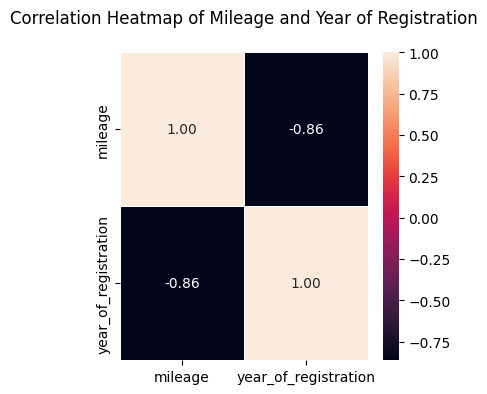

In [ ]:
# correlation matrix
correlation_matrix = df[['mileage', 'year_of_registration']].corr(method='spearman')

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',linewidths=0.5)

plt.title('Correlation Heatmap of Mileage and Year of Registration\n', fontsize=12)
plt.show()

# <font face="Arial" size=3 color='#a9b5ca'> 3.1.2. Price vs. Mileage
<font>

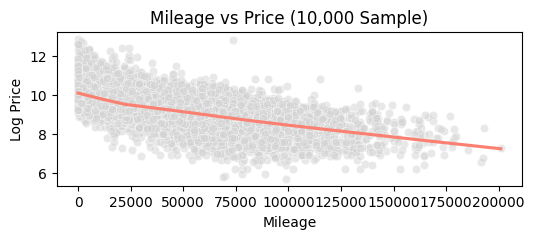

In [ ]:
# Take a sample of 10,000 points
sample_df = df.sample(10000, random_state=42)

plt.figure(figsize=(6, 2))

# Scatter plot for sampled data
sns.scatterplot(data=sample_df, x='mileage', y=np.log1p(sample_df['price']), alpha=0.5, color='lightgrey')

# Regression line
sns.regplot(
    data=sample_df,
    x='mileage',
    y=np.log1p(sample_df['price']),
    scatter=False,
    color='salmon',
    lowess=True
)

plt.title('Mileage vs Price (10,000 Sample)', fontsize=12)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('Log Price', fontsize=10)
plt.show()

# <font face="Arial" size=4 color='#8496b3'> 3.2. Quantitative - Categorical (2-3)
<font>

# <font face="Arial" size=3 color='#a9b5ca'> 3.2.1. Price vs. Standard Make
<font>

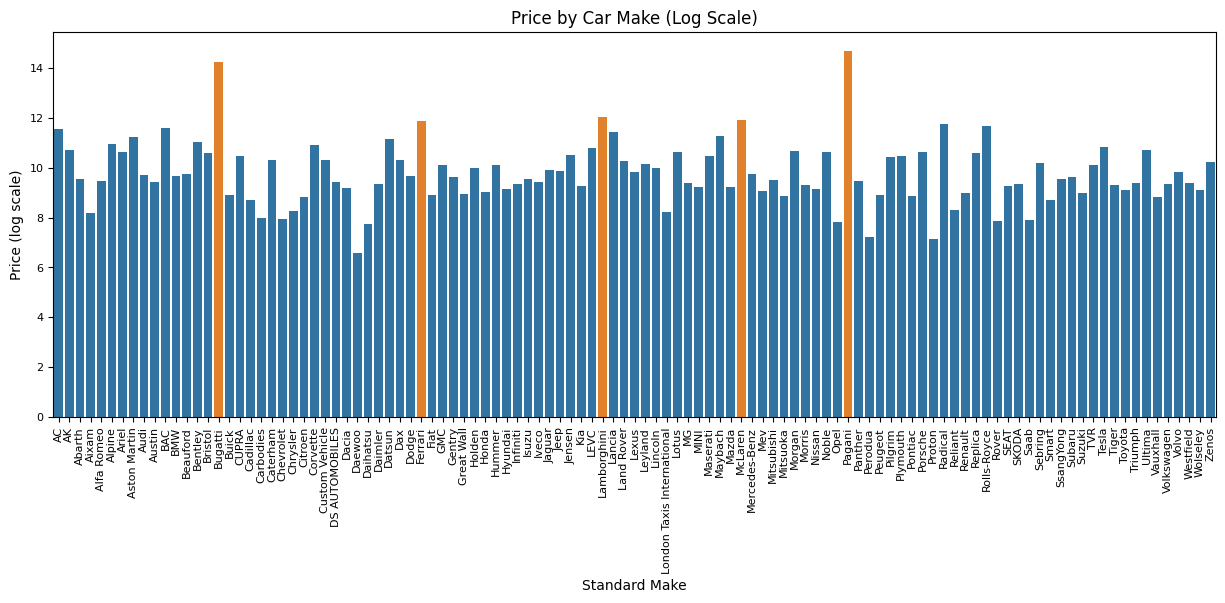

In [ ]:
plt.figure(figsize=(15,5))
bar_colors = ['lightgrey' if (x != "Pagani") & (x != "Bugatti") & (x != "Lamborghini") & (x != "Ferrari") & (x != "McLaren")
         else 'salmon' for x in df['standard_make']]
sns.barplot(x=df.standard_make, y=df.log_price, errorbar= None, hue= bar_colors, legend= False)
sns.color_palette("vlag", as_cmap=True)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Standard Make', fontsize=10)
plt.yticks(fontsize=8)
plt.ylabel('Price (log scale)', fontsize=10)

plt.title('Price by Car Make (Log Scale)', fontsize=12)
plt.show()

In [ ]:
df.loc[df['standard_make']=="Pagani"]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,sync_check,price_category,log_price
241316,202007020778467,1900.0,18,White,Pagani,Huayra,USED,2018.0,2400000,Convertible,False,Petrol,True,High(premium),14.69098


In [ ]:
df.loc[df['standard_make']=="Bugatti"].shape

(8, 15)

In [ ]:
df.loc[df['standard_make']=="Lamborghini"].shape

(348, 15)

In [ ]:
# We have one record from Pagani standard maker and although the this vehicle itself is high-priced,
# and we have average prices of the vehicles on thhe y axis, we can not rely on the info that is illustrated in this plot

# <font face="Arial" size=3 color='#a9b5ca'> 3.2.2. Year of Registration vs. Fuel Type
<font>

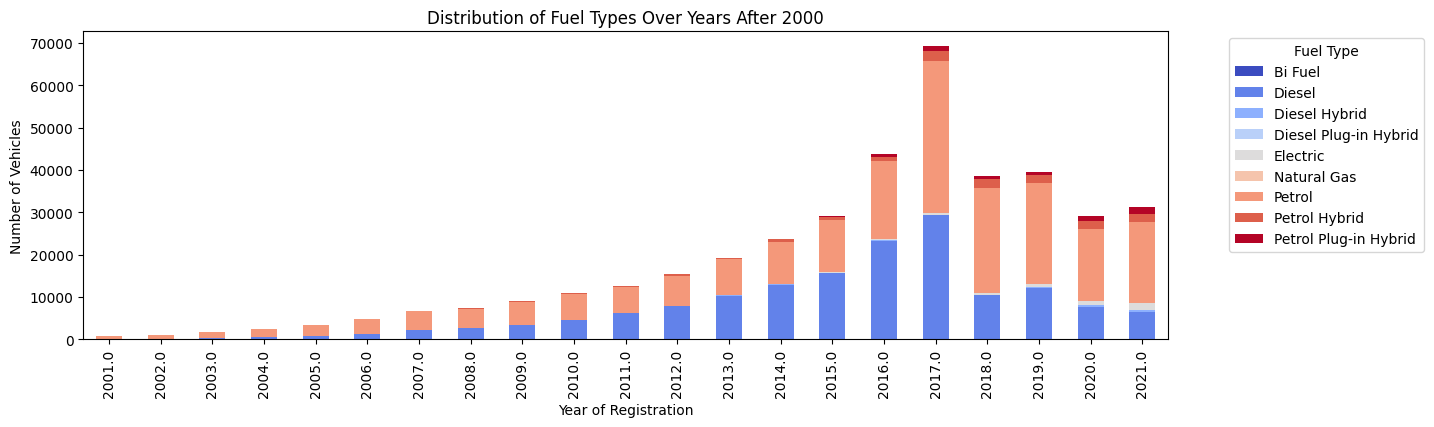

In [ ]:
fuel_type_count = df[df['year_of_registration'] > 2000].groupby(['year_of_registration', 'fuel_type']).size().unstack(fill_value=0)

ax = fuel_type_count.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 4),
    colormap='coolwarm'
)

plt.title('Distribution of Fuel Types Over Years After 2000', fontsize=12)
plt.xlabel('Year of Registration', fontsize=10)
plt.ylabel('Number of Vehicles', fontsize=10)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
df.loc[(df["year_of_registration"]==2020.0) & (df["fuel_type"]=="Electric")].shape

(1099, 15)

In [ ]:
df.loc[(df["year_of_registration"]==2021.0) & (df["fuel_type"]=="Electric")].shape

(1517, 15)

# <font face="Arial" size=3 color='#a9b5ca'> 3.2.3. Mileage vs. Body Type
<font>

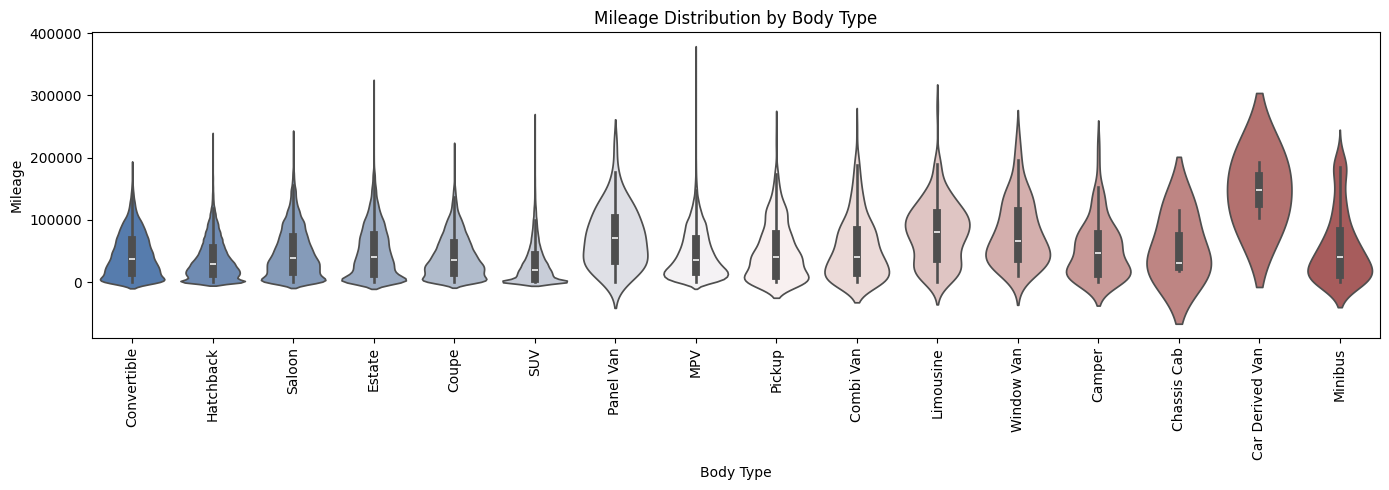

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(14, 5))
sns.violinplot(data=df, x='body_type', y='mileage', hue=None, palette='vlag', inner='box')

plt.title('Mileage Distribution by Body Type', fontsize=12)
plt.xlabel('Body Type', fontsize=10)
plt.ylabel('Mileage', fontsize=10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
df['body_type'].unique()

array(['Convertible', 'Hatchback', 'Saloon', 'Estate', 'Coupe', 'SUV',
       'Panel Van', 'MPV', 'Pickup', 'Combi Van', 'Limousine',
       'Window Van', 'Camper', 'Chassis Cab', 'Car Derived Van',
       'Minibus'], dtype=object)

In [ ]:
median_mileage_by_body_type = df.groupby('body_type')['mileage'].median().sort_values(ascending=False).reset_index()
median_mileage_by_body_type

,body_type,mileage
0,Car Derived Van,148000.00
1,Limousine,80186.00
2,Panel Van,71000.00
3,Window Van,65927.00
4,Camper,46500.00
5,Combi Van,40537.00
6,Minibus,40500.00
7,Estate,40352.00
8,Pickup,39906.25
9,Saloon,39252.00


# <font face="Arial" size=4 color='#8496b3'> 3.3. Categorical - Categorical (2-3)
<font>

# <font face="Arial" size=3 color='#a9b5ca'> 3.3.1. Standard Make vs. Fuel Type
<font>

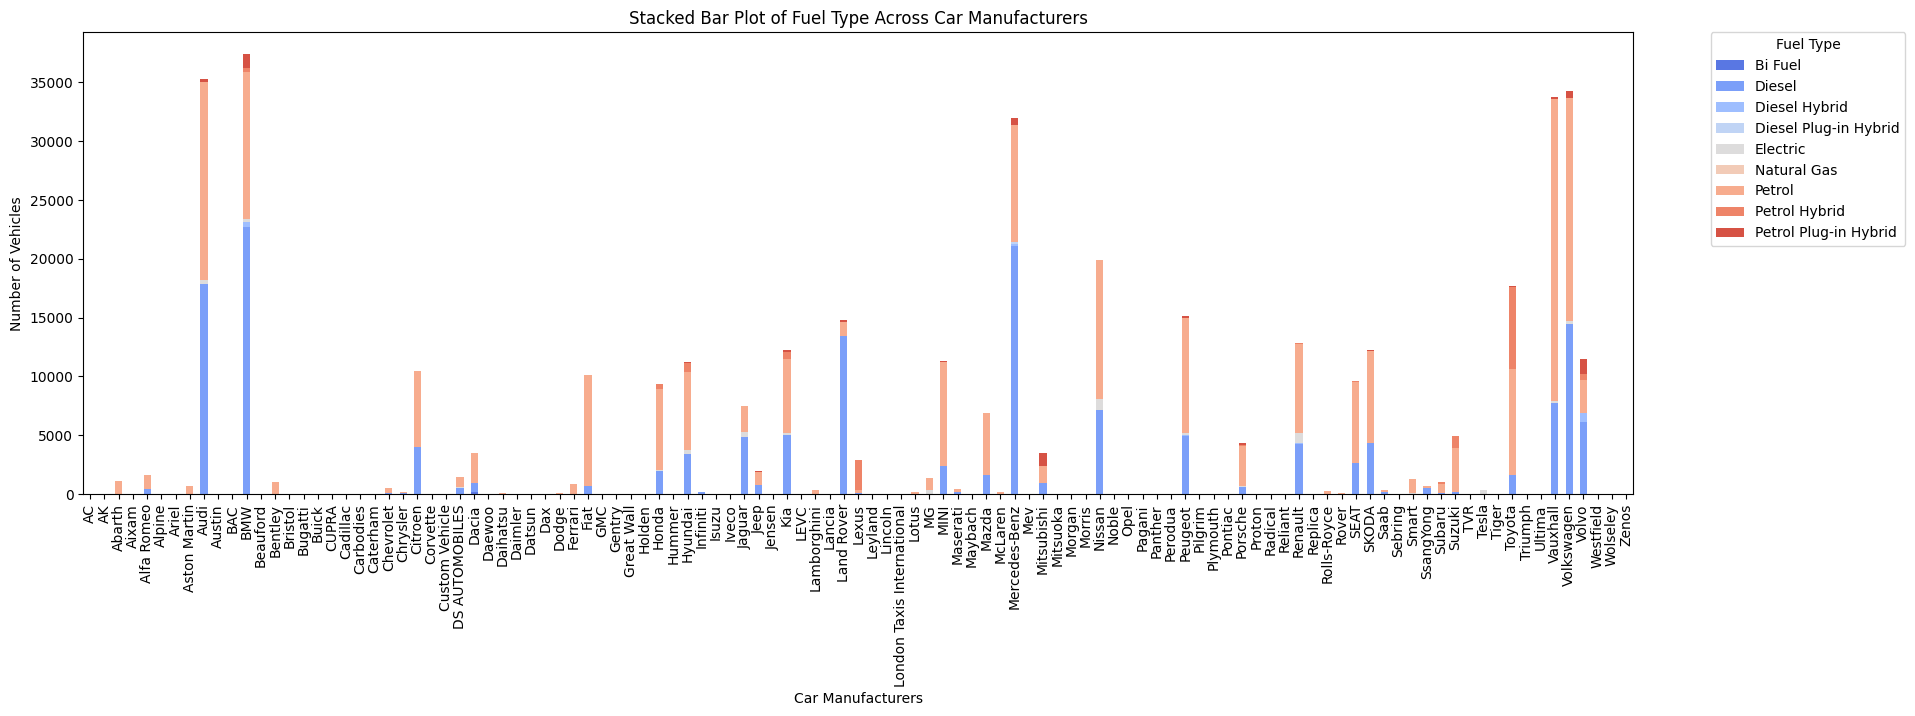

In [ ]:
unique_fuel_types = df['fuel_type'].unique()

palette = sns.color_palette('coolwarm', n_colors=len(unique_fuel_types))
color_map = dict(zip(unique_fuel_types, palette))

ax = pd.crosstab(df['standard_make'], df['fuel_type']).plot(
    kind='bar',
    stacked=True,
    figsize=(20, 6),
    color=[color_map[fuel] for fuel in unique_fuel_types]
)

plt.title('Stacked Bar Plot of Fuel Type Across Car Manufacturers', fontsize=12)
plt.legend(
    title='Fuel Type',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10
)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.xlabel("Car Manufacturers", fontsize=10)
plt.ylabel("Number of Vehicles", fontsize=10)

plt.show()

In [ ]:
df.loc[(df['standard_make']=='Toyota') & (df['fuel_type']=='Petrol Hybrid')].shape

(6954, 15)

In [ ]:
df.loc[(df['standard_make']=='Lexus') & (df['fuel_type']=='Petrol Hybrid')].shape

(2570, 15)

# <font face="Arial" size=3 color='#a9b5ca'> 3.3.2. Price Category vs. Fuel Type
<font>

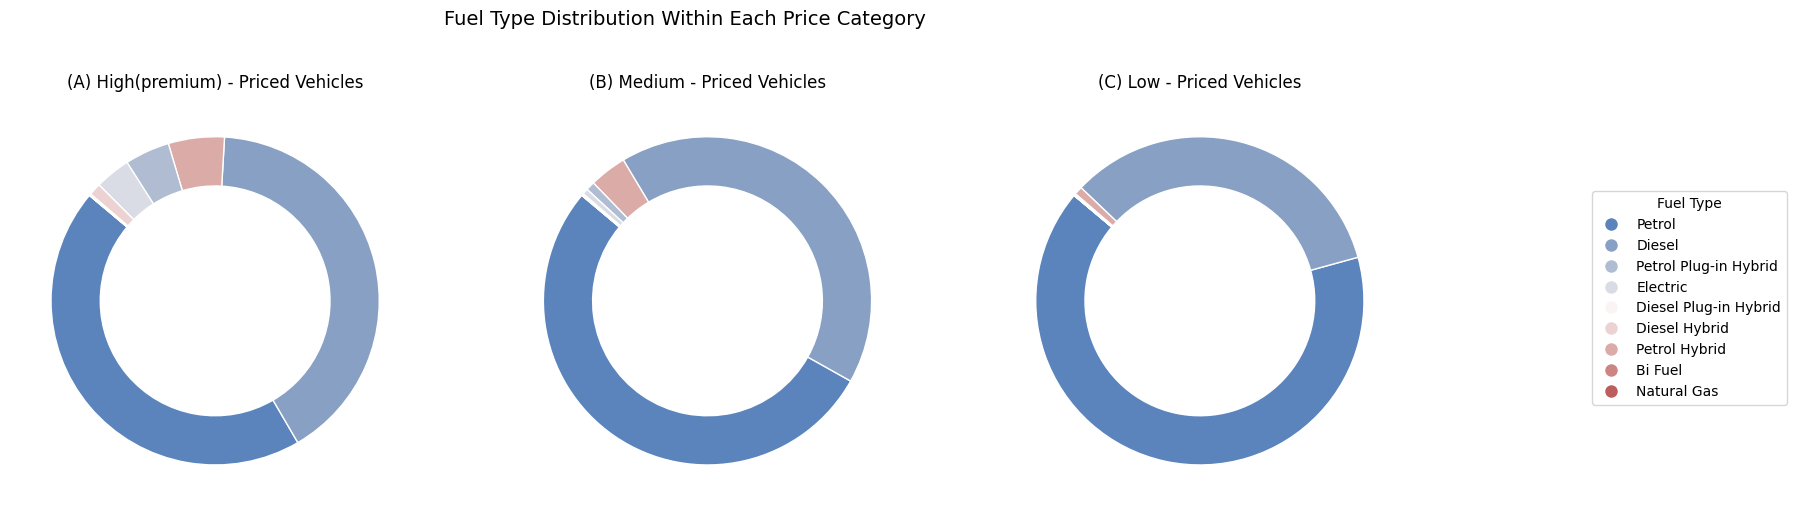

In [ ]:
price_categories = df['price_category'].unique()

fig, axes = plt.subplots(1, len(price_categories), figsize=(6 * len(price_categories), 6))
if len(price_categories) == 1:
    axes = [axes]

# 'vlag' color palette
fuel_types = df['fuel_type'].unique()
palette = sns.color_palette('vlag', n_colors=len(fuel_types))
color_map = dict(zip(fuel_types, palette))

# subplot titles
subplot_labels = ['A', 'B', 'C']

for ax, category, label in zip(axes, price_categories, subplot_labels):
    # Get fuel_type distribution for the current price category
    category_data = df[df['price_category'] == category]['fuel_type'].value_counts()

    # Map colors based on fuel_type
    colors = [color_map[fuel] for fuel in category_data.index]

    # Plot the donut chart
    wedges, _ = ax.pie(
        category_data,
        labels=None,   # No text on segments
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=colors
    )

    ax.set_title(f'({label}) {category} - Priced Vehicles', fontsize=12)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[fuel], markersize=10)
           for fuel in fuel_types]
fig.legend(
    handles,
    fuel_types,
    title='Fuel Type',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.suptitle('Fuel Type Distribution Within Each Price Category\n\n', fontsize=14)
plt.show()